<a href="https://colab.research.google.com/github/abdohamdyy/Teeth-Classification-pretrained-model-and-streamlit/blob/main/Teeth_classification_with_pretrained_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install streamlit pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 112.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
!npm install localtunnel


added 22 packages, and audited 23 packages in 1s

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues, run:
  npm audit fix

Run `npm audit` for details.


In [ ]:
#import liberares
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, VGG16, EfficientNetB0, InceptionResNetV2, DenseNet121, Xception, InceptionV3, MobileNetV2, NASNetLarge, NASNetMobile, MobileNetV3Large, MobileNetV3Small
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout, BatchNormalization, Input, Add, Multiply, Conv2D, Activation, GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255
    )
val_test_datagen = ImageDataGenerator(rescale=1./255)
traingen = datagen.flow_from_directory(
    '/content/drive/MyDrive/Teeth_Dataset/Training',
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)
valgen = val_test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Teeth_Dataset/Validation',
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)
testgen = val_test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Teeth_Dataset/Testing',
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
X = base_model.output
X = MaxPooling2D()(X)
X = Flatten()(X)
X = Dense(128, activation='relu')(X)
predictions = Dense(7, activation='softmax')(X)
model = Model(inputs=base_model.input, outputs=predictions)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 3,733,575 (14.24 MB)

 Trainable params: 1,475,591 (5.63 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Train the model
history = model.fit(
    traingen,
    validation_data=valgen,
    epochs=50,
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


193/193 ━━━━━━━━━━━━━━━━━━━━ 1384s 7s/step - accuracy: 0.4271 - loss: 4.1373 - val_accuracy: 0.7091 - val_loss: 0.8741
Epoch 2/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 75s 256ms/step - accuracy: 0.6981 - loss: 0.9186 - val_accuracy: 0.7636 - val_loss: 0.6729
Epoch 3/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 53s 268ms/step - accuracy: 0.7458 - loss: 0.7702 - val_accuracy: 0.7130 - val_loss: 0.9921
Epoch 4/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 50s 252ms/step - accuracy: 0.7457 - loss: 0.7256 - val_accuracy: 0.8541 - val_loss: 0.3928
Epoch 5/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 53s 260ms/step - accuracy: 0.8096 - loss: 0.5564 - val_accuracy: 0.8531 - val_loss: 0.3943
Epoch 6/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 53s 267ms/step - accuracy: 0.8038 - loss: 0.5721 - val_accuracy: 0.8920 - val_loss: 0.3071
Epoch 7/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 80s 258ms/step - accuracy: 0.8510 - loss: 0.4186 - val_accuracy: 0.8735 - val_loss: 0.4284
Epoch 8/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 51s 257ms/step - accuracy: 0.8538 - loss: 0.4248 - val_

In [ ]:
test_loss, test_acc = model.evaluate(testgen)
print(f'Test accuracy: {test_acc:.2f}')

65/65 ━━━━━━━━━━━━━━━━━━━━ 306s 5s/step - accuracy: 0.9771 - loss: 0.0664
Test accuracy: 0.98


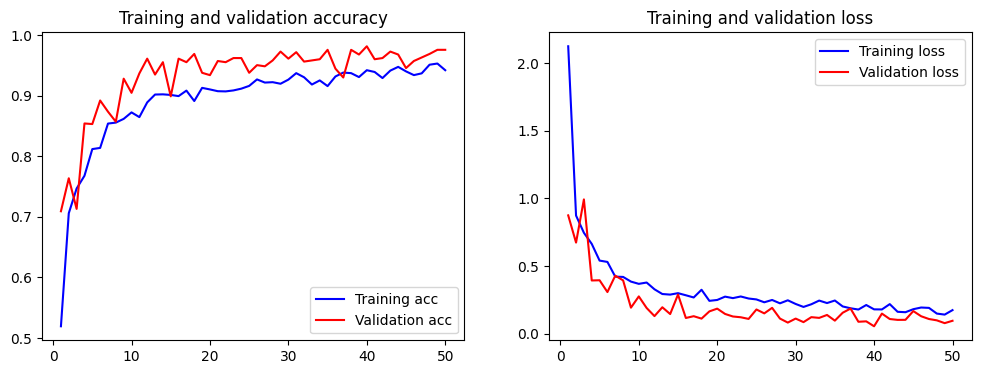

In [ ]:
# Plot training & validation accuracy/loss curves
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_training_history(history)

In [ ]:
# Save the entire model to a HDF5 file
model.save('my_model.h5')

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('/content/my_model.h5')

# Define the class labels
class_labels = ['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']
# Streamlit App
st.title("Teeth Classification")
st.write("Upload an image to classify it.")

uploaded_file = st.file_uploader("Choose an image...", type="jpg")

if uploaded_file is not None:
    # Preprocess the image
    img = image.load_img(uploaded_file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])

    st.image(uploaded_file, caption='Uploaded Image.', use_column_width=True)
    st.write("Prediction:", class_labels[predicted_class])
    st.write("Confidence:", np.max(predictions[0]))


Overwriting app.py


In [ ]:
import urllib
public_ip = urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n")
print("Public IP for localtunnel:", public_ip)

# Run Streamlit app and use LocalTunnel to expose it
!streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501


Public IP for localtunnel: 34.16.182.26
your url is: https://huge-webs-change.loca.lt
^C
